# DATA 602 Classification Project: Chicago Energy Data

## Data

The data comrpises the energy usage in households, businesses, and industries in Chicago in the year 2010. The dataset consists of electricty and gas used for the months and also characteristics of the distribution of usage over these months. It also consists of data related building and occupancy characteristics. 

An Exploratory data analysis(EDA) will be performed to understand the data at hand and process the data before the modeling phase.


## Exploratory Data Analysis

## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

energy = pd.read_csv('/content/Energy_Usage_2010.csv')

## Previewing the data

In [3]:
energy.head(5)

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
0,Archer Heights,1.703157e+14,Residential,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,89.0,24.0,2.0,71.33,3.87,23.0,0.9582,9.0,0.3910,23.0
1,Ashburn,1.703170e+14,Residential,Multi 7+,7334.0,7741.0,4214.0,4284.0,2518.0,4273.0,...,112.0,67.0,2.0,41.00,1.81,62.0,0.9254,50.0,0.8059,62.0
2,Auburn Gresham,1.703171e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,102.0,48.0,3.0,86.00,3.00,34.0,0.7082,23.0,0.6759,34.0
3,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,121.0,56.0,2.0,84.00,2.95,41.0,0.7321,32.0,0.7800,41.0
4,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,62.0,23.0,2.0,85.00,3.26,19.0,0.8261,11.0,0.5790,19.0


In [4]:
print('The number of rows:',energy.shape[0])
print('The number of columns:',energy.shape[1])

The number of rows: 67051
The number of columns: 73


## Checking the data types

In [5]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67051 entries, 0 to 67050
Data columns (total 73 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   COMMUNITY AREA NAME                  67051 non-null  object 
 1   CENSUS BLOCK                         66974 non-null  float64
 2   BUILDING TYPE                        66974 non-null  object 
 3   BUILDING_SUBTYPE                     66974 non-null  object 
 4   KWH JANUARY 2010                     66180 non-null  float64
 5   KWH FEBRUARY 2010                    66180 non-null  float64
 6   KWH MARCH 2010                       66180 non-null  float64
 7   KWH APRIL 2010                       66180 non-null  float64
 8   KWH MAY 2010                         66180 non-null  float64
 9   KWH JUNE 2010                        66180 non-null  float64
 10  KWH JULY 2010                        66180 non-null  float64
 11  KWH AUGUST 2010             

The only features that are of the type object are:
1. COMMUNITY AREA NAME
2. BUILDING TYPE
3. BUILDING SUBTYPE
4. ELECTRICITY ACCOUNTS 
5. GAS ACCOUNTS

The first three features being of type object makes sense. But in the last two columns other than 'less than 4' and 'nan', the other values are just a number. Therefore, we will replace the 'Less than 4' with the number 3 and change the datatype of the column.

In [6]:
energy['ELECTRICITY ACCOUNTS'].unique()

array([nan, '8', 'Less than 4', '6', '5', '4', '23', '10', '7', '11',
       '18', '22', '12', '9', '60', '155', '108', '20', '14', '52', '13',
       '29', '257', '115', '15', '27', '189', '636', '48', '91', '160',
       '57', '19', '76', '24', '84', '49', '245', '116', '73', '82', '94',
       '120', '25', '113', '32', '17', '43', '147', '30', '45', '219',
       '303', '41', '40', '21', '47', '55', '44', '98', '16', '244',
       '173', '504', '97', '71', '202', '39', '35', '37', '31', '42',
       '56', '26', '28', '33', '38', '34', '59', '72', '62', '36', '46',
       '86', '53', '114', '404', '79', '167', '50', '54', '171', '110',
       '63', '74', '66', '68', '123', '65', '141', '281', '61', '64',
       '77', '67', '146', '727', '109', '232', '75', '69', '1249', '80',
       '70', '165', '119', '51', '58', '121', '150', '255', '149', '866',
       '100', '85', '285', '343', '99', '292', '117', '184', '233', '634',
       '158', '421', '103', '88', '216', '78', '804', '142', '

In [7]:
energy['GAS ACCOUNTS'].unique()

array(['11', nan, '4', 'Less than 4', '9', '5', '6', '7', '68', '8', '21',
       '15', '17', '22', '56', '14', '39', '237', '25', '12', '18', '13',
       '28', '10', '54', '31', '141', '30', '16', '86', '66', '111', '19',
       '40', '23', '27', '42', '41', '36', '35', '29', '20', '32', '47',
       '24', '34', '45', '44', '33', '37', '26', '38', '53', '72', '50',
       '57', '46', '55', '105', '67', '52', '79', '51', '48', '58', '121',
       '75', '49', '70', '73', '208', '84', '64', '82', '69', '147',
       '407', '131', '62', '109', '663', '81', '60', '61', '43', '80',
       '151', '207', '76', '115', '71', '85', '429', '63', '99', '259',
       '78', '74', '59', '127', '243', '144', '249', '65', '375', '129',
       '155', '322', '130', '241', '145', '226', '94', '95', '87', '83',
       '390', '158', '89', '184', '248', '199', '318', '120', '403',
       '133', '112', '101', '349', '266', '96', '77', '90', '415', '93',
       '108', '152', '117', '125', '124', '153', '122',

In [8]:
energy['ELECTRICITY ACCOUNTS'].replace(to_replace = 'Less than 4', value = 3, inplace = True)
energy['GAS ACCOUNTS'].replace(to_replace = 'Less than 4', value = 3, inplace = True)

In [9]:
energy['ELECTRICITY ACCOUNTS'] = energy['ELECTRICITY ACCOUNTS'].astype(float)
energy['GAS ACCOUNTS'] = energy['GAS ACCOUNTS'].astype(float)

## Checking for duplicates 

In [10]:
duplicate = energy[energy.duplicated(keep = 'last')]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS


There are no duplicates rows in our dataset. What about duplicate columns? The names of the columns OCCUPIED UNITS and OCCUPIED HOUSING UNITS sounds like they are talking about the same thing. Let us check if they are the same. 

In [11]:
energy[['OCCUPIED UNITS', 'OCCUPIED HOUSING UNITS']].corr()

,OCCUPIED UNITS,OCCUPIED HOUSING UNITS
OCCUPIED UNITS,1.0,1.0
OCCUPIED HOUSING UNITS,1.0,1.0


The columns **occupied units** and **occupied housing units** seem to be the same. So one of them can be dropped. 

The **census block** is a categorical feature which has too many unique values. So it would be a good idea to drop this column.



 

## Checking for null values

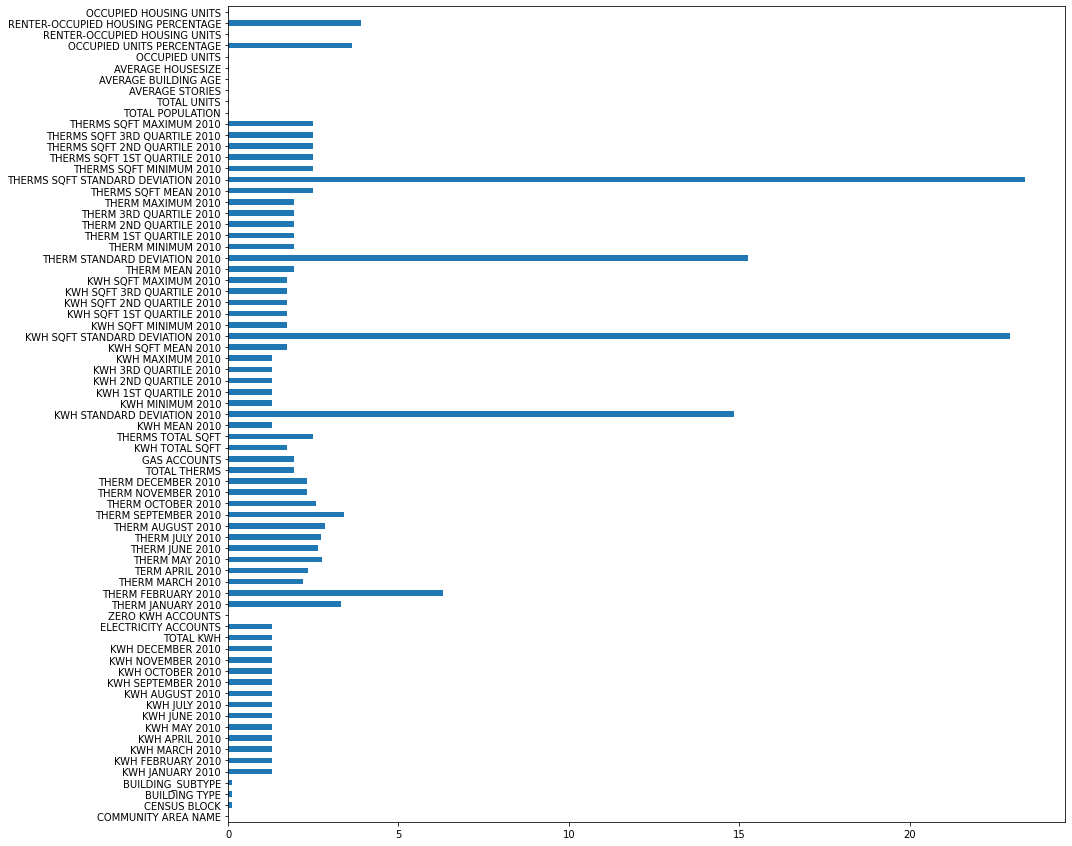

In [12]:
(energy.isnull().sum(axis = 0)*100/len(energy)).plot.barh(figsize=(15,15))
plt.show()


All the columns have less than 25% missing values. Therefore, we will not drop any columns based on the high percentage of missing values. 

## Understanding the columns in our dataset

In [13]:
energy['CENSUS BLOCK'].nunique()

35699

In [14]:
energy['COMMUNITY AREA NAME'].nunique()

77

Some of the columns such as the ones that are mean, standard deviation, minimum, maximum , 1st, 2nd and 3rd quartile for the distribution over month would be correlated to the individual month KWH and GAS columns. We can check this using the correlation matrix. 

In [15]:
correlated_features_KWH = ['KWH JANUARY 2010', 'KWH FEBRUARY 2010', 'KWH MARCH 2010', 'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010', 'KWH JULY 2010', 'KWH AUGUST 2010', 
                       'KWH SEPTEMBER 2010', 'KWH OCTOBER 2010', 'KWH NOVEMBER 2010', 'KWH DECEMBER 2010', 'TOTAL KWH', 'KWH TOTAL SQFT', 'KWH MEAN 2010', 'KWH MINIMUM 2010',
                       'KWH STANDARD DEVIATION 2010', 'KWH 1ST QUARTILE 2010', 'KWH 2ND QUARTILE 2010', 'KWH 3RD QUARTILE 2010', 'KWH MAXIMUM 2010','KWH SQFT MEAN 2010',  
                       'KWH SQFT MINIMUM 2010', 'KWH SQFT STANDARD DEVIATION 2010', 'KWH SQFT 1ST QUARTILE 2010', 'KWH SQFT 2ND QUARTILE 2010', 'KWH SQFT 3RD QUARTILE 2010', 
                       'KWH SQFT MAXIMUM 2010']

In [16]:
len(correlated_features_KWH)

28

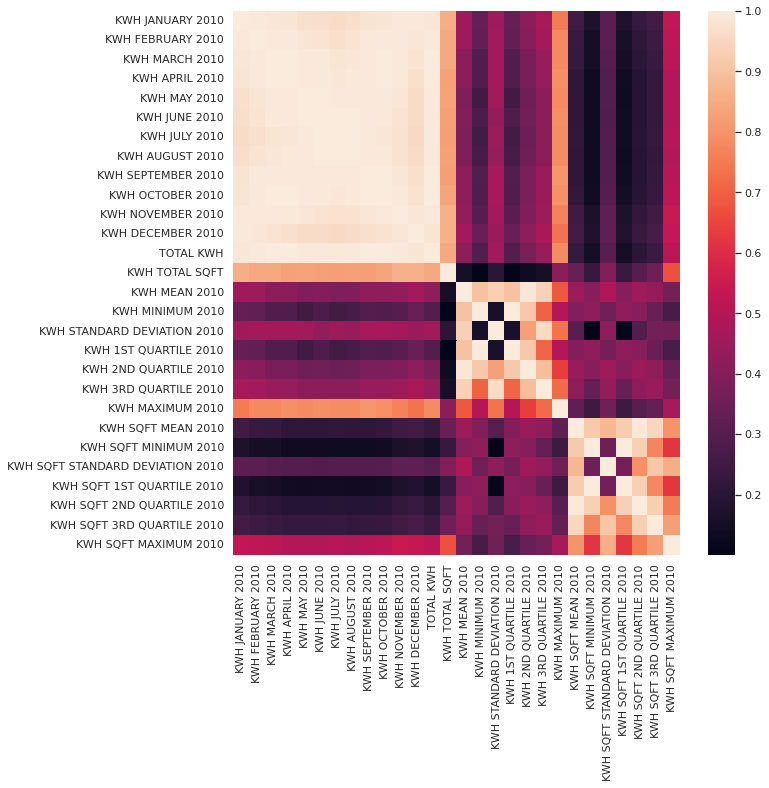

In [17]:
correlation_martix_KWH = energy[correlated_features_KWH].corr()
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(correlation_martix_KWH, annot = False)
plt.show()

The KWH used for different months seem to be higly correlated to each other. They are all similar across the months and do not have any extreme value occurance.The columns such as mean, standard deviation, and others capture the information in the months columns. **We can drop the data for different months as they are not going to be useful for modeling.** There are also no other information in the dataset that allows us to understand why there is variation over the months. Therefore, we can drop the KWH consumption for different months. 

**'KWH TOTAL SQFT' is the total square footage associated with energy usage.**

In [18]:
energy[['TOTAL KWH', 'KWH TOTAL SQFT']].corr()

,TOTAL KWH,KWH TOTAL SQFT
TOTAL KWH,1.000000,0.844967
KWH TOTAL SQFT,0.844967,1.000000


In [19]:
correlated_features_THERM = ['THERM JANUARY 2010', 'THERM FEBRUARY 2010', 'THERM MARCH 2010', 'THERM APRIL 2010', 'THERM MAY 2010', 'THERM JUNE 2010', 'THERM JULY 2010', 'THERM AUGUST 2010', 
                       'THERM SEPTEMBER 2010', 'THERM OCTOBER 2010', 'THERM NOVEMBER 2010', 'THERM DECEMBER 2010', 'TOTAL THERMS', 'THERMS TOTAL SQFT', 'THERM MEAN 2010', 'THERM MINIMUM 2010',
                       'THERM STANDARD DEVIATION 2010', 'THERM 1ST QUARTILE 2010', 'THERM 2ND QUARTILE 2010', 'THERM 3RD QUARTILE 2010', 'THERM MAXIMUM 2010','THERMS SQFT MEAN 2010',  
                       'THERMS SQFT MINIMUM 2010', 'THERMS SQFT STANDARD DEVIATION 2010', 'THERMS SQFT 1ST QUARTILE 2010', 'THERMS SQFT 2ND QUARTILE 2010', 'THERMS SQFT 3RD QUARTILE 2010', 
                       'THERMS SQFT MAXIMUM 2010']

In [20]:
energy.rename(columns = {'TERM APRIL 2010':'THERM APRIL 2010'}, inplace = True)

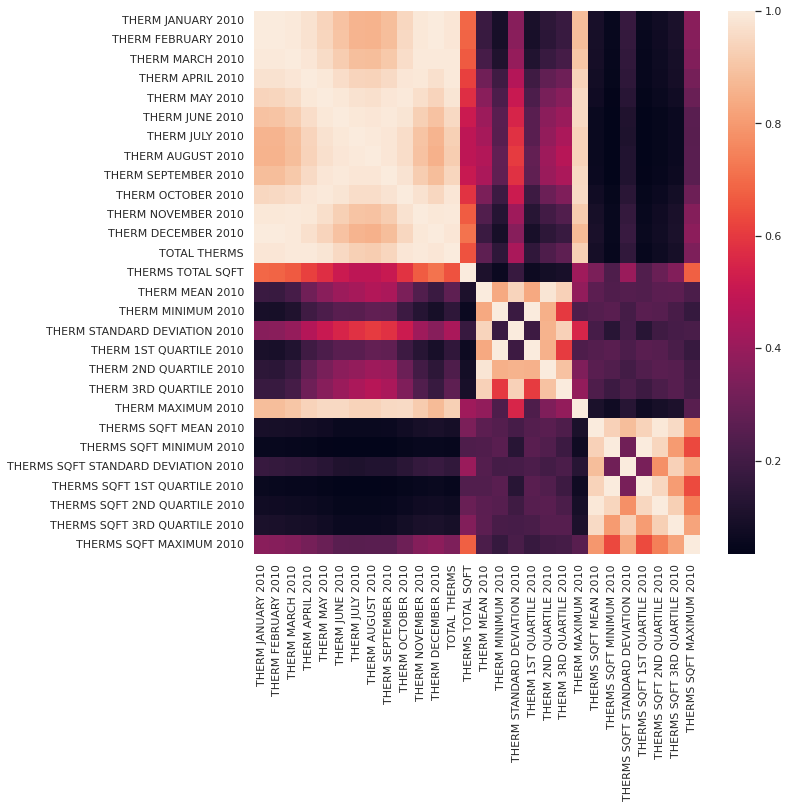

In [21]:
correlation_martix_THERM = energy[correlated_features_THERM].corr()
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(correlation_martix_THERM, annot = False)
plt.show()

As stated above for the KWH columns, the THERM consumption for different months are highly correlated and do not seem to show any extreme values. Also, there is other information in the dataset that helps us understand the slight variation over the months occurs. Therefore, I decide to remove these month columns as well. 

In [22]:
energy['BUILDING_SUBTYPE'].nunique()

6

In [23]:
energy['BUILDING_SUBTYPE'].unique()

array(['Multi < 7', 'Multi 7+', 'Commercial', 'Single Family',
       'Municipal', 'Industrial', nan], dtype=object)

The columns to be dropped include:
1. CENSUS BLOCK
2. OCCUPIED HOUSING UNITS
3. BUILDING_SUBTYPE (This gives the similar information as building type)
4. All the KWH month data columns 
5. All the THERM month data columns
6. OCCUPIED UNITS 
7. RENTER-OCCUPIED HOUSING UNITS

Here I am dropping the OCCUPIED UNITS and RENTER-OCCUPIED HOUSING UNITS because it is the percentage of occupied units and renter-occupied units that plays a crucial role in influencing the energy and gas consumption that the actual units. I decide to keep the TOTAL UNITS column as it might help identify the building type. 

Total columns that will be dropped equals to 3+ 12+12 +2 = 29. The new dataframe would have 73 -29 = 44 columns.



In [24]:
drop_columns = ['CENSUS BLOCK', 'BUILDING_SUBTYPE', 'OCCUPIED HOUSING UNITS', 'KWH JANUARY 2010', 'KWH FEBRUARY 2010', 'KWH MARCH 2010', 'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010',
                'KWH JULY 2010', 'KWH AUGUST 2010', 'KWH SEPTEMBER 2010', 'KWH OCTOBER 2010','KWH NOVEMBER 2010', 'KWH DECEMBER 2010', 'THERM JANUARY 2010', 'THERM FEBRUARY 2010', 'THERM MARCH 2010', 'THERM APRIL 2010', 'THERM MAY 2010', 'THERM JUNE 2010',
                'THERM JULY 2010', 'THERM AUGUST 2010', 'THERM SEPTEMBER 2010', 'THERM OCTOBER 2010','THERM NOVEMBER 2010', 'THERM DECEMBER 2010','OCCUPIED UNITS', 
                'RENTER-OCCUPIED HOUSING UNITS' ]

In [25]:
energy_new = energy.drop(drop_columns, axis = 1, inplace  = False)

In [26]:
energy_new.shape

(67051, 44)

In [27]:
energy_new.head()

,COMMUNITY AREA NAME,BUILDING TYPE,TOTAL KWH,ELECTRICITY ACCOUNTS,ZERO KWH ACCOUNTS,TOTAL THERMS,GAS ACCOUNTS,KWH TOTAL SQFT,THERMS TOTAL SQFT,KWH MEAN 2010,...,THERMS SQFT 2ND QUARTILE 2010,THERMS SQFT 3RD QUARTILE 2010,THERMS SQFT MAXIMUM 2010,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING PERCENTAGE
0,Archer Heights,Residential,NaN,NaN,0,10917.0,11.0,NaN,11134.0,NaN,...,1779.0,2162.0,2650.0,89.0,24.0,2.0,71.33,3.87,0.9582,0.3910
1,Ashburn,Residential,82064.0,8.0,3,NaN,NaN,10892.0,NaN,27354.67,...,NaN,NaN,NaN,112.0,67.0,2.0,41.00,1.81,0.9254,0.8059
2,Auburn Gresham,Commercial,NaN,NaN,7,6057.0,4.0,NaN,7347.0,NaN,...,7347.0,7347.0,7347.0,102.0,48.0,3.0,86.00,3.00,0.7082,0.6759
3,Austin,Commercial,NaN,NaN,2,400.0,3.0,NaN,2146.0,NaN,...,2146.0,2146.0,2146.0,121.0,56.0,2.0,84.00,2.95,0.7321,0.7800
4,Austin,Commercial,NaN,NaN,3,949.0,3.0,NaN,2146.0,NaN,...,2146.0,2146.0,2146.0,62.0,23.0,2.0,85.00,3.26,0.8261,0.5790


In [28]:
energy_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67051 entries, 0 to 67050
Data columns (total 44 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   COMMUNITY AREA NAME                  67051 non-null  object 
 1   BUILDING TYPE                        66974 non-null  object 
 2   TOTAL KWH                            66180 non-null  float64
 3   ELECTRICITY ACCOUNTS                 66180 non-null  float64
 4   ZERO KWH ACCOUNTS                    67051 non-null  int64  
 5   TOTAL THERMS                         65755 non-null  float64
 6   GAS ACCOUNTS                         65755 non-null  float64
 7   KWH TOTAL SQFT                       65901 non-null  float64
 8   THERMS TOTAL SQFT                    65378 non-null  float64
 9   KWH MEAN 2010                        66180 non-null  float64
 10  KWH STANDARD DEVIATION 2010          57095 non-null  float64
 11  KWH MINIMUM 2010            

## Basic distribution of the features

### Categorical features
> The categorical features in the reduced dataset are COMMUNITY AREA NAME and BUILDING TYPE. 

In [29]:
energy_new['COMMUNITY AREA NAME'].nunique()

77

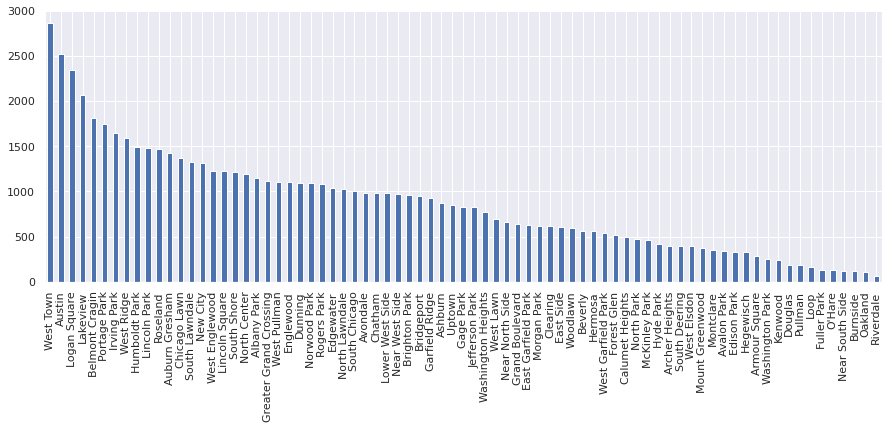

In [30]:
from IPython.core.pylabtools import figsize
energy_new['COMMUNITY AREA NAME'].value_counts().plot.bar(figsize = (15,5))
plt.show()
# This plot is not very useful

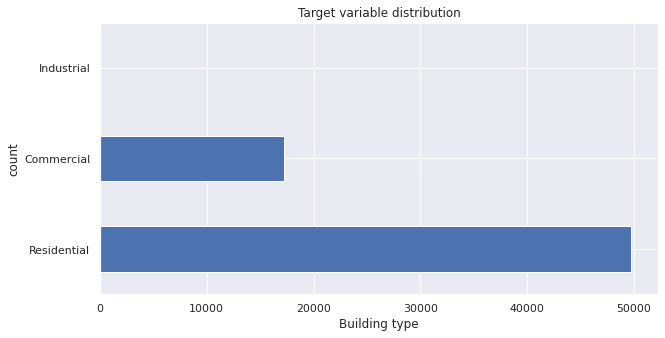

In [31]:
energy_new['BUILDING TYPE'].value_counts().plot.barh(figsize = (10,5))
plt.xlabel('Building type')
plt.ylabel('count')
plt.title('Target variable distribution')
plt.show()

In [32]:
energy_new['BUILDING TYPE'].value_counts()

Residential    49747
Commercial     17185
Industrial        42
Name: BUILDING TYPE, dtype: int64

**This means that the target variable distribution is highly imbalanced.**

### Numerical features
> The other 42 features in the dataset are numerical. I have mentally divided the numerical columns into three parts. First is the columns that's related to electricity usage( KWH columns). The second is the gas usage related columns and finally the columns that describes the building such as total units, average house size etc.



In [33]:
energy_new.describe().applymap(lambda x: f"{x:0.2f}")

,TOTAL KWH,ELECTRICITY ACCOUNTS,ZERO KWH ACCOUNTS,TOTAL THERMS,GAS ACCOUNTS,KWH TOTAL SQFT,THERMS TOTAL SQFT,KWH MEAN 2010,KWH STANDARD DEVIATION 2010,KWH MINIMUM 2010,...,THERMS SQFT 2ND QUARTILE 2010,THERMS SQFT 3RD QUARTILE 2010,THERMS SQFT MAXIMUM 2010,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING PERCENTAGE
count,66180.00,66180.00,67051.00,65755.00,65755.00,65901.00,65378.00,66180.00,57095.00,66180.00,...,65378.00,65378.00,65378.00,67037.00,67037.00,67051.00,67051.00,67037.00,64606.00,64433.00
mean,237518.76,14.18,5.22,20015.32,11.91,25640.02,24692.64,62882.98,42799.99,36809.11,...,6798.70,8910.48,10754.99,105.18,48.38,1.89,71.59,3.45,0.88,0.51
std,4294268.78,55.63,23.37,205946.23,14.61,298884.80,275509.80,1347881.40,929262.13,1199766.61,...,63109.06,76874.66,97345.42,801.34,426.94,1.96,34.17,26.15,0.13,0.29
min,102.00,3.00,0.00,25.00,3.00,300.00,300.00,102.00,0.00,100.00,...,300.00,300.00,300.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,28223.00,4.00,1.00,4883.00,4.00,5390.00,5373.00,8232.69,3631.96,2157.00,...,1244.50,1480.00,1889.00,37.00,15.00,1.14,53.00,2.15,0.83,0.29
50%,62341.50,9.00,2.00,10354.00,9.00,10873.00,10860.00,10523.61,5152.48,4370.00,...,2116.00,2453.00,2800.00,64.00,25.00,1.75,80.00,2.70,0.91,0.54
75%,118396.50,15.00,5.00,18603.50,15.00,18760.00,18882.50,15676.50,8087.84,8766.00,...,3564.00,4416.00,5200.75,105.00,42.00,2.00,96.50,3.32,0.97,0.73
max,583174732.00,7305.00,2463.00,39667571.00,663.00,48592746.00,45511769.00,227750000.00,162851048.90,227752064.00,...,6548217.00,6548217.00,9090576.00,67388.00,51372.00,110.00,158.00,2061.92,1.00,1.00


#### What is the distribution of electricity and gas used? 

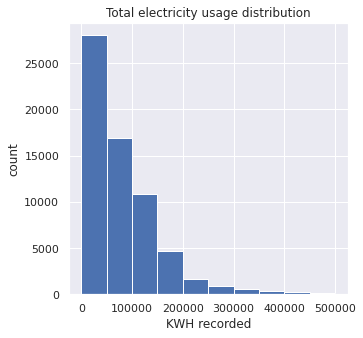

In [34]:
energy_new['TOTAL KWH'].hist(bins=10, range = (0, 500000), figsize = (5,5))
plt.title('Total electricity usage distribution')
plt.xlabel('KWH recorded')
plt.ylabel('count')
plt.show()

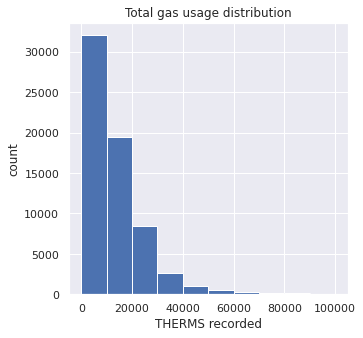

In [35]:
energy_new['TOTAL THERMS'].hist(bins=10, range = (0, 100000), figsize = (5,5))
plt.title('Total gas usage distribution')
plt.xlabel('THERMS recorded')
plt.ylabel('count')
plt.show()
#range = (0, 100000),

In [36]:
energy_new[['TOTAL KWH', 'TOTAL THERMS']].describe()

,TOTAL KWH,TOTAL THERMS
count,6.618000e+04,6.575500e+04
mean,2.375188e+05,2.001532e+04
std,4.294269e+06,2.059462e+05
min,1.020000e+02,2.500000e+01
25%,2.822300e+04,4.883000e+03
50%,6.234150e+04,1.035400e+04
75%,1.183965e+05,1.860350e+04
max,5.831747e+08,3.966757e+07


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


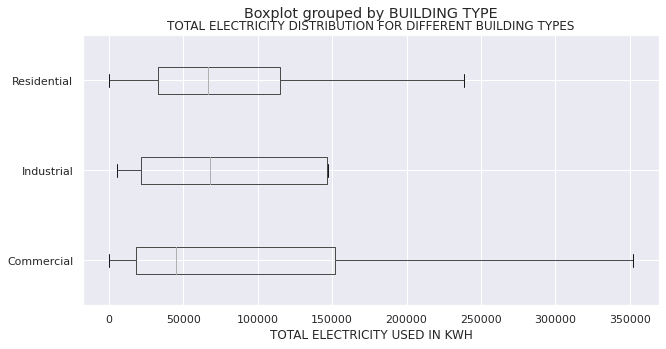

In [37]:
energy_new.boxplot(column='TOTAL KWH', by='BUILDING TYPE', vert=False, showfliers=False, figsize = (10,5))
plt.title('TOTAL ELECTRICITY DISTRIBUTION FOR DIFFERENT BUILDING TYPES')
plt.xlabel('TOTAL ELECTRICITY USED IN KWH')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


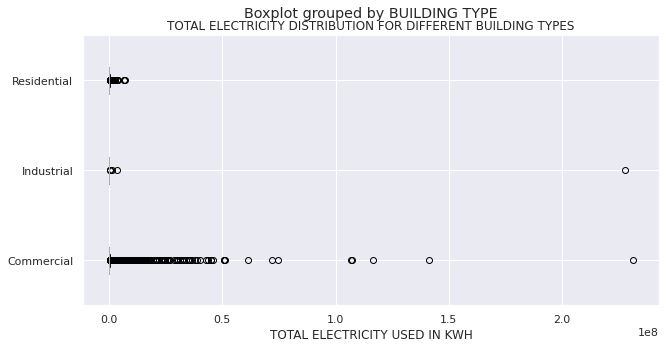

In [38]:
energy_new.boxplot(column='TOTAL KWH', by='BUILDING TYPE', vert=False, showfliers=True, figsize = (10,5))
plt.title('TOTAL ELECTRICITY DISTRIBUTION FOR DIFFERENT BUILDING TYPES')
plt.xlabel('TOTAL ELECTRICITY USED IN KWH')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


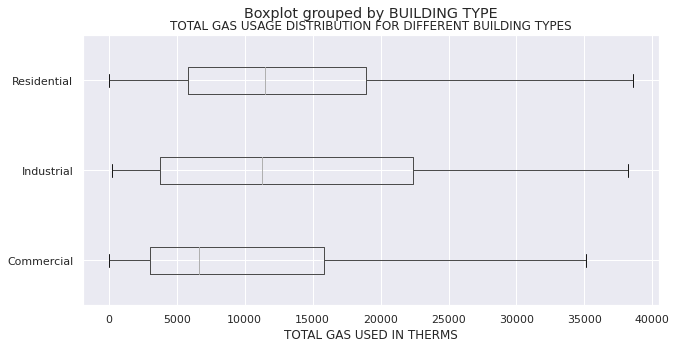

In [39]:
energy_new.boxplot(column='TOTAL THERMS', by='BUILDING TYPE', vert=False, showfliers=False, figsize = (10,5))
plt.title('TOTAL GAS USAGE DISTRIBUTION FOR DIFFERENT BUILDING TYPES')
plt.xlabel('TOTAL GAS USED IN THERMS')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


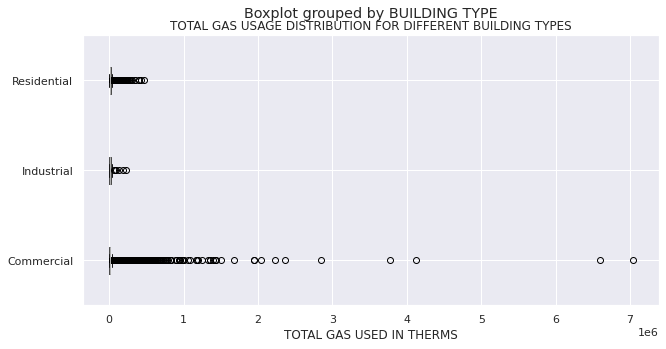

In [40]:
energy_new.boxplot(column='TOTAL THERMS', by='BUILDING TYPE', vert=False, showfliers=True, figsize = (10,5))
plt.title('TOTAL GAS USAGE DISTRIBUTION FOR DIFFERENT BUILDING TYPES')
plt.xlabel('TOTAL GAS USED IN THERMS')
plt.show()

There seems to be a lot of outliers in both the KWH TOTAL and THERMS TOTAL column. How can I handle these outliers?
The outliers will be handled based on further study.

#### What is the distribution of building related features for different building types?

In [41]:
energy_new[['BUILDING TYPE','TOTAL POPULATION', 'TOTAL UNITS','AVERAGE STORIES', 'AVERAGE BUILDING AGE', 'AVERAGE HOUSESIZE']].groupby('BUILDING TYPE').describe().T

BUILDING TYPE                 Commercial  Industrial   Residential
TOTAL POPULATION     count  17178.000000   42.000000  49740.000000
                     mean      98.076027   46.761905     78.974930
                     std      123.031607   57.895115     72.313111
                     min        0.000000    0.000000      0.000000
                     25%       28.000000    0.000000     39.000000
                     50%       69.000000   17.000000     63.000000
                     75%      123.000000   81.000000     99.000000
                     max     1590.000000  213.000000   1496.000000
TOTAL UNITS          count  17178.000000   42.000000  49740.000000
                     mean      50.920945   22.333333     33.697326
                     std       82.447695   28.247743     42.992560
                     min        0.000000    0.000000      0.000000
                     25%       13.000000    0.000000     15.000000
                     50%       31.000000    8.000000     24.000000
                     75%       56.000000   38.750000     39.000000
                     max     1365.000000   94.000000   1165.000000
AVERAGE STORIES      count  17185.000000   42.000000  49747.000000
                     mean       2.311859    1.261905      1.741287
                     std        3.566367    1.397900      0.823010
                     min        1.000000    1.000000      1.000000
                     25%        1.000000    1.000000      1.200000
                     50%        2.000000    1.000000      1.750000
                     75%        2.500000    1.000000      2.000000
                     max      110.000000   10.000000     53.000000
AVERAGE BUILDING AGE count  17185.000000   42.000000  49747.000000
                     mean      54.416185    8.619048     77.606139
                     std       41.583041   25.915390     28.873362
                     min        0.000000    0.000000      0.000000
                     25%        6.500000    0.000000     59.820000
                     50%       54.750000    0.000000     82.750000
                     75%       90.000000    0.000000     97.935000
                     max      146.000000  114.000000    158.000000
AVERAGE HOUSESIZE    count  17178.000000   42.000000  49740.000000
                     mean       2.291110    1.580952      2.871123
                     std        1.125074    1.425376      0.905074
                     min        0.000000    0.000000      0.000000
                     25%        1.760000    0.000000      2.300000
                     50%        2.290000    1.735000      2.820000
                     75%        2.970000    2.562500      3.410000
                     max       12.000000    5.060000      9.000000

### Analyzing trends in the data

#### Which community areas consume most amount of electricity and gas?

In [42]:
energy_new.groupby('COMMUNITY AREA NAME')['TOTAL KWH'].mean().sort_values(ascending = False).iloc[:5]

COMMUNITY AREA NAME
Loop               1.491014e+07
Near South Side    4.457935e+06
Riverdale          3.143337e+06
Near North Side    2.668429e+06
Near West Side     1.269908e+06
Name: TOTAL KWH, dtype: float64

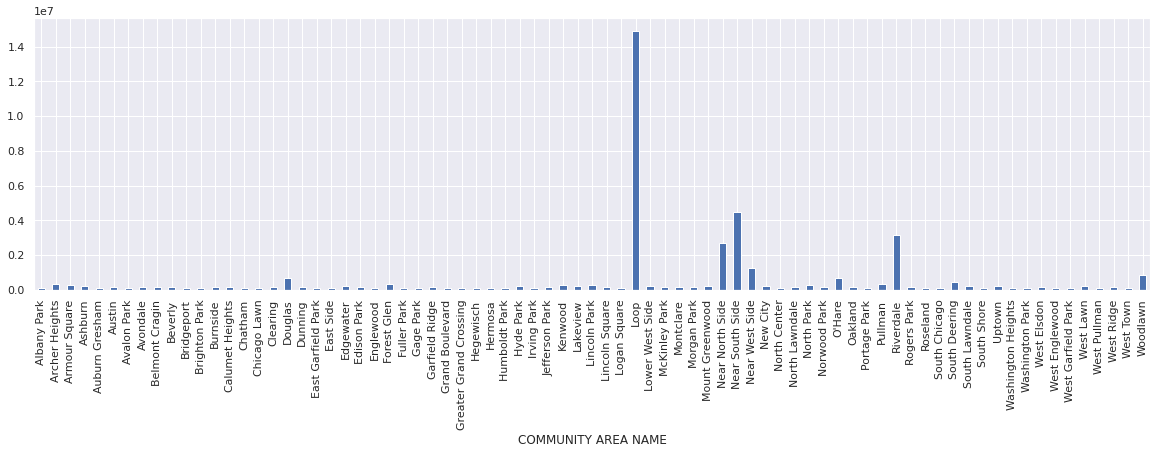

In [43]:
community_KWH = energy_new.groupby('COMMUNITY AREA NAME')['TOTAL KWH'].mean()
community_KWH.plot.bar(figsize = (20,5))

In [44]:
energy_new.groupby('COMMUNITY AREA NAME')['TOTAL THERMS'].mean().sort_values(ascending = False).iloc[:5]

COMMUNITY AREA NAME
Loop               332774.381944
Near North Side     90990.113238
Near South Side     86491.793103
Riverdale           81847.000000
Near West Side      68207.540426
Name: TOTAL THERMS, dtype: float64

Loop, Near North Side, Near South Side, Riverdale, and Near West Side seem to eb the top five communities that record highest electricity and gas usage. 

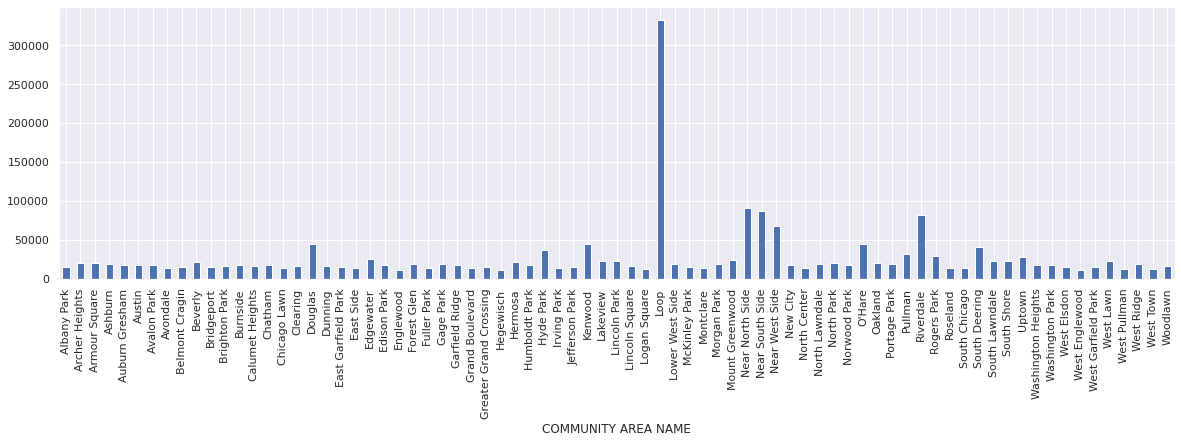

In [45]:
community_THERMS = energy_new.groupby('COMMUNITY AREA NAME')['TOTAL THERMS'].mean()
community_THERMS.plot.bar(figsize = (20,5))

#### Does the energy used or gas used depend on the percentage of occupied units? We expect it to be related. How are they related?

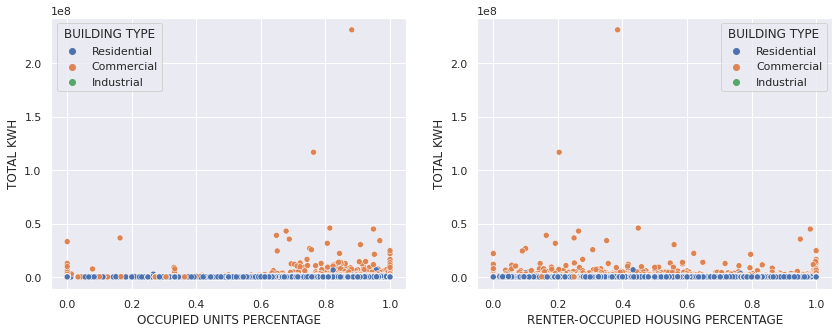

In [46]:
import seaborn as sns
# Seaborn can be more useful to plot data in dataframes?
fig, ax = plt.subplots(figsize=(14,5),ncols=2)
sns.scatterplot(x ='OCCUPIED UNITS PERCENTAGE',y ='TOTAL KWH', ax = ax[0], data=energy_new, hue='BUILDING TYPE')
sns.scatterplot(x = 'RENTER-OCCUPIED HOUSING PERCENTAGE',y ='TOTAL KWH', ax = ax[1], data=energy_new, hue='BUILDING TYPE')
plt.show()

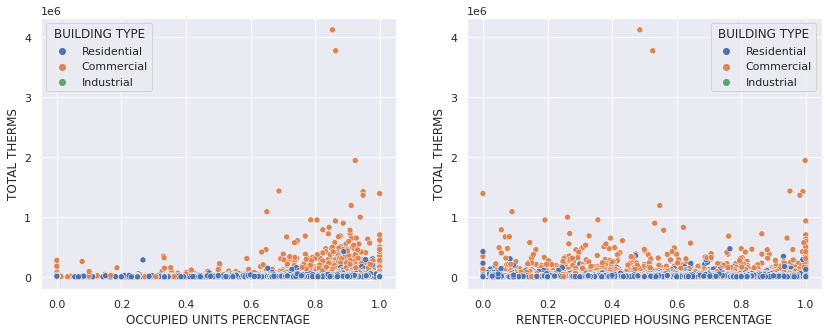

In [47]:
fig, axs = plt.subplots(figsize=(14,5),ncols=2)
sns.scatterplot(x= 'OCCUPIED UNITS PERCENTAGE',y = 'TOTAL THERMS', ax = axs[0], data=energy_new, hue='BUILDING TYPE')
sns.scatterplot(x = 'RENTER-OCCUPIED HOUSING PERCENTAGE',y ='TOTAL THERMS', ax = axs[1], data=energy_new, hue='BUILDING TYPE')
plt.show()

We see outliers in these plots as well. There are some buildings where the total KWH recorded seems to be very high than the ones that have nearly the same occupied percentage and renter-occupied housing percentage. But this need not be an error. There could be commerical buildings that are only say 40% occupied but might consume a lot of electricity because of the work they do. 

However, it is clear that the commerical buildings consume more elctricity than the residential and industrial buildings. 

#### What are the distributions of building size and  building age in these three categories?

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


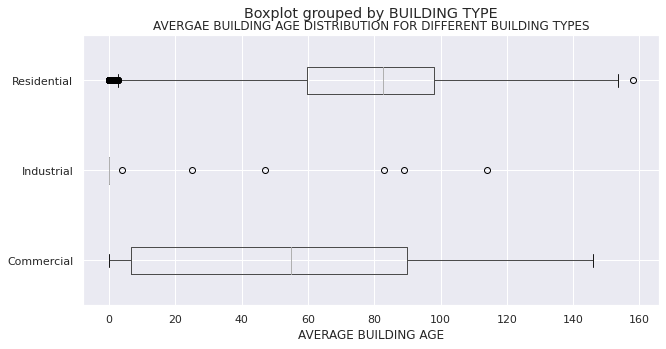

In [48]:
energy_new.boxplot(column='AVERAGE BUILDING AGE', by='BUILDING TYPE', vert=False, showfliers=True, figsize = (10,5))
plt.title('AVERGAE BUILDING AGE DISTRIBUTION FOR DIFFERENT BUILDING TYPES')
plt.xlabel('AVERAGE BUILDING AGE')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


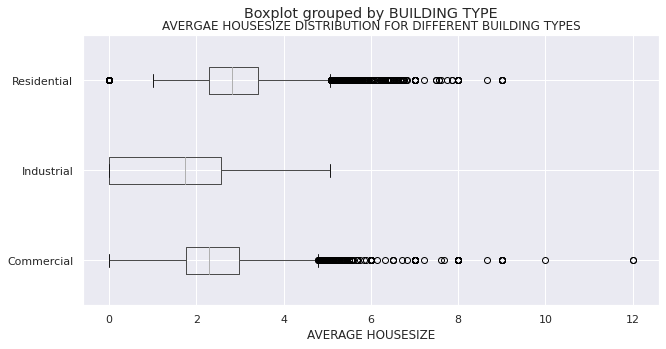

In [49]:
energy_new.boxplot(column='AVERAGE HOUSESIZE', by='BUILDING TYPE', vert=False, showfliers=True, figsize = (10,5))
plt.title('AVERGAE HOUSESIZE DISTRIBUTION FOR DIFFERENT BUILDING TYPES')
plt.xlabel('AVERAGE HOUSESIZE')
plt.show()

#### How are the building types distributed across different communities?

In [50]:
building_community = energy_new.groupby('COMMUNITY AREA NAME')['BUILDING TYPE'].value_counts()
building_community.unstack(level = -1)


BUILDING TYPE,Commercial,Industrial,Residential
COMMUNITY AREA NAME,,,
Albany Park,380.0,1.0,772.0
Archer Heights,81.0,1.0,312.0
Armour Square,102.0,1.0,178.0
Ashburn,100.0,1.0,766.0
Auburn Gresham,268.0,NaN,1157.0
...,...,...,...
West Lawn,99.0,NaN,593.0
West Pullman,95.0,NaN,1011.0
West Ridge,505.0,NaN,1088.0


### Handeling outliers

I am yet to understand how to handle the outliers present in some of the columns in the dataset. I would either choose to remove the outliers or keep them depending on the extend to which they fall away from the general distribution and based on reasoning for their existence. 

In [51]:
Q1 = energy_new.quantile(0.25)
Q3 = energy_new.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
#Reference: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

TOTAL KWH                              90173.5000
ELECTRICITY ACCOUNTS                      11.0000
ZERO KWH ACCOUNTS                          4.0000
TOTAL THERMS                           13720.5000
GAS ACCOUNTS                              11.0000
KWH TOTAL SQFT                         13370.0000
THERMS TOTAL SQFT                      13509.5000
KWH MEAN 2010                           7443.8100
KWH STANDARD DEVIATION 2010             4455.8750
KWH MINIMUM 2010                        6609.0000
KWH 1ST QUARTILE 2010                   5604.8750
KWH 2ND QUARTILE 2010                   6964.5000
KWH 3RD QUARTILE 2010                   9566.0000
KWH MAXIMUM 2010                       13030.2500
KWH SQFT MEAN 2010                      2473.7500
KWH SQFT STANDARD DEVIATION 2010         811.9950
KWH SQFT MINIMUM 2010                   1727.0000
KWH SQFT 1ST QUARTILE 2010              1772.0000
KWH SQFT 2ND QUARTILE 2010              2361.0000
KWH SQFT 3RD QUARTILE 2010              3006.5000


To conclude, energy_new dataset would be used for modeling along with the pre-processing pipelines. If any outlier handeling is done, then those changes would be incorporated to the energy_new dataset before the modeling phase.
